# **imports**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

# using classifier chains
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB

# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

In [ ]:

#from sklearn.cross_validation import KFold   #For K-fold cross validation
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
from sklearn.multiclass import OneVsRestClassifier

# **Load the data**

In [ ]:
data=pd.read_csv('export.csv')
data.info()

In [4]:
data.shape

(234082, 181)

# **pre-processing**

**Sex column**

0-male
1-feamle

In [5]:
data['Sex']=data['Sex'].replace(['Male'],0)
data['Sex']=data['Sex'].replace(['Female'],1)

**Age column**

Removal of all patients under the age of 15

In [6]:
data=data.drop(data[data['Age recode with <1 year olds']=='00 years'].index)
data=data.drop(data[data['Age recode with <1 year olds']=='01-04 years'].index)
data=data.drop(data[data['Age recode with <1 year olds']=='05-09 years'].index)
data=data.drop(data[data['Age recode with <1 year olds']=='10-14 years'].index)

age- Ordinal Number Encoding

In [7]:
ageClassDict =   {   '15-19 years':1,
                     '25-29 years':1,
                     '30-34 years':1, 
                     '35-39 years':1,
                     '40-44 years':2,
                     '45-49 years':2,  
                     '50-54 years':3,
                     '55-59 years':3,
                     '60-64 years':4, 
                     '65-69 years':4,
                     '70-74 years':5,
                     '75-79 years':5,  
                     '80-84 years':6,
                     '85+ years':6        
                }
data['Age group'] = data['Age recode with <1 year olds'].map(ageClassDict)
data=data.drop('Age recode with <1 year olds',axis = 1)


**Year of diagnosis**

Removal of all patients diagnosed before 1981 - over 40 years

Removal of all patients diagnosed after 2018 - 10 years prediction

In [8]:
data=data.drop(data[data['Year of diagnosis']<1981].index)
data=data.drop(data[data['Year of diagnosis']>2008].index)

**Race recode column**

We replaced missing values with the most common value 83% - white

In [9]:
data['Race recode (White, Black, Other)']=data['Race recode (White, Black, Other)'].replace(['Unknown'],'White')
raceClassDict =   {  'White':0,
                     'Black':1,
                     'Other (American Indian/AK Native, Asian/Pacific Islander)':2        
                }
data['Race'] = data['Race recode (White, Black, Other)'].map(raceClassDict)
data=data.drop('Race recode (White, Black, Other)',axis = 1)

**Median household income column**

According to studies we read, the average wage in the United States in the 1980s was $ 21,020

The rest of the supplements are based on the OECD index




In [10]:
data.loc[(data['Median household income inflation adj to 2019']=='Unknown/missing/no match/Not 1990-2018')&(data['Year of diagnosis']<1990),'Median household income inflation adj to 2019']='< $35,000'
data.loc[(data['Median household income inflation adj to 2019']=='Unknown/missing/no match/Not 1990-2018')&(data['Year of diagnosis']<1997),'Median household income inflation adj to 2019']='$45,000 - $49,999'
data.loc[(data['Median household income inflation adj to 2019']=='Unknown/missing/no match/Not 1990-2018')&(data['Year of diagnosis']<2000),'Median household income inflation adj to 2019']='$50,000 - $54,999'
data.loc[(data['Median household income inflation adj to 2019']=='Unknown/missing/no match/Not 1990-2018')&(data['Year of diagnosis']<2007),'Median household income inflation adj to 2019']='$55,000 - $59,999'
data.loc[(data['Median household income inflation adj to 2019']=='Unknown/missing/no match/Not 1990-2018')&(data['Year of diagnosis']<2019),'Median household income inflation adj to 2019']='$60,000 - $64,999'

In [11]:
incomeClassDict =   { '< $35,000':0,
                     '$35,000 - $39,999':1,
                     '$40,000 - $44,999':2, 
                     '$45,000 - $49,999':3,
                     '$50,000 - $54,999':4,
                     '$55,000 - $59,999':5,  
                     '$60,000 - $64,999':6,
                     '$65,000 - $69,999':7,
                     '$70,000 - $74,999':8, 
                     '$75,000+':9
                         
                }
data['income'] = data['Median household income inflation adj to 2019'].map(incomeClassDict)
data=data.drop('Median household income inflation adj to 2019',axis = 1)

 **alive or dead**
 
 Survival months flag-drop column
 
 This column directly affects the variable we want to predict so we will remove it.

In [ ]:
data=data.drop('Survival months flag',1)

This column directly affects the variable we want to predict so we will remove it.

In [ ]:
data=data.drop('Vital status recode (study cutoff used)',1)
data=data.drop('SEER other cause of death classification',1)
data=data.drop('SEER cause-specific death classification',1)
data=data.drop('COD to site rec KM',1)
data=data.drop('COD to site recode',1)

**histology**

These columns are repetitive so we will remove them and leave only one column of this type


NHL - Nodal         0
NHL - Extranodal    1

In [ ]:
data=data.drop('Site - mal+ins (most detail)',1)
data=data.drop('Site recode ICD-O-3/WHO 2008 (for SIRs)',1)
data=data.drop('Site - mal+ins (mid detail)',1)
data=data.drop('Site - malignant (most detail)',1)
data=data.drop('Site - malignant (mid detail)',1)
data=data.drop('AYA site recode/WHO 2008',1)
data=data.drop('ICCC site recode ICD-O-3/WHO 2008',1)
data=data.drop('Histology recode - broad groupings',1)

data=data.drop('ICCC site recode 3rd edition/IARC 2017',1)
data=data.drop('ICCC site rec extended ICD-O-3/WHO 2008',1)
data=data.drop('ICCC site recode extended 3rd edition/IARC 2017',1)

data=data.drop('Site recode - rare tumors',1)
data=data.drop('CS Schema - AJCC 6th Edition',1)
data=data.drop('AYA site recode 2020 Revision',1)
data=data.drop('Primary Site - labeled',1)
data=data.drop('Histologic Type ICD-O-3',1)


Hodgkin's lymphoma removal

In [15]:
data=data.drop(data[data['Site recode ICD-O-3/WHO 2008']=='Hodgkin - Extranodal'].index)
data=data.drop(data[data['Site recode ICD-O-3/WHO 2008']=='Hodgkin - Nodal'].index)

We were left with only two types of non-Hodgkin's lymphoma

In [16]:
siteClassDict =   { 'NHL - Nodal':0,
                     'NHL - Extranodal':1     
                }
data['Site'] = data['Site recode ICD-O-3/WHO 2008'].map(siteClassDict)
data=data.drop('Site recode ICD-O-3/WHO 2008',axis = 1)

**TNM record**

In [17]:
tnmClassDict =   { 'Lymphoma':0,
                    'MycosisFungoides':1,
                    'LymphomaOcularAdnexa':2    
                }
data['TNM'] = data['TNM 7/CS v0204+ Schema recode'].map(tnmClassDict)
data=data.drop('TNM 7/CS v0204+ Schema recode',axis = 1)

**single value and blanks**

In our dataset there are a lot of blanks or columns with a single value.

In [ ]:
data=data.drop('Behavior code ICD-O-3',1)
data=data.drop('Grade Clinical (2018+)',1)
data=data.drop('Grade Pathological (2018+)',1)
data=data.drop('Schema ID (2018+)',1)
data=data.drop('AJCC ID (2018+)',1)
data=data.drop('SEER historic stage A (1973-2015)',1)
data=data.drop('AFP Post-Orchiectomy Lab Value Recode (2010+)',1)
data=data.drop('AFP Pretreatment Interpretation Recode (2010+)',1)
data=data.drop('Breslow Thickness Recode (2010+)',1)
data=data.drop('CA-125 Pretreatment Interpretation Recode (2010+)',1)
data=data.drop('CEA Pretreatment Interpretation Recode (2010+)',1)
data=data.drop('Fibrosis Score Recode (2010+)',1)
data=data.drop('Gestational Trophoblastic Prognostic Scoring Index Recode (2010+)',1)
data=data.drop('Gleason Patterns Clinical Recode (2010+)',1)
data=data.drop('Gleason Patterns Pathological Recode (2010+)',1)
data=data.drop('Gleason Score Clinical Recode (2010+)',1)
data=data.drop('Gleason Score Pathological Recode (2010+)',1)
data=data.drop('hCG Post-Orchiectomy Range Recode (2010+)',1)
data=data.drop('Invasion Beyond Capsule Recode (2010+)',1)
data=data.drop('LDH Post-Orchiectomy Range Recode (2010+)',1)
data=data.drop('LDH Pretreatment Level Recode (2010+)',1)
data=data.drop('LN Head and Neck Levels I-III Recode (2010+)',1)
data=data.drop('LN Head and Neck Levels IV-V Recode (2010+)',1)
data=data.drop('LN Head and Neck Levels VI-VII Recode (2010+)',1)

data=data.drop('LN Head and Neck Other Recode (2010+)',1)
data=data.drop('LN Positive Axillary Level I-II Recode (2010+)',1)
data=data.drop('Lymph Node Size Recode (2010+)',1)
data=data.drop('Measured Basal Diameter Recode (2010+)',1)
data=data.drop('Measured Thickness Recode (2010+)',1)
data=data.drop('Mitotic Rate Melanoma Recode (2010+)',1)
data=data.drop('Number of Cores Positive Recode (2010+)',1)
data=data.drop('Number of Cores Examined Recode (2010+)',1)
data=data.drop('Number of Examined Para-Aortic Nodes Recode (2010+)',1)
data=data.drop('Number of Examined Pelvic Nodes Recode (2010+)',1)
data=data.drop('Number of Positive Para-Aortic Nodes Recode (2010+)',1)
data=data.drop('Number of Positive Pelvic Nodes Recode (2010+)',1)
data=data.drop('Perineural Invasion Recode (2010+)',1)
data=data.drop('Peritoneal Cytology Recode (2010+)',1)
data=data.drop('Pleural Effusion Recode (2010+)',1)
data=data.drop('PSA Lab Value Recode (2010+)',1)
data=data.drop('Residual Tumor Volume Post Cytoreduction Recode (2010+)',1)
data=data.drop('Sarcomatoid Features Recode (2010+)',1)
data=data.drop('Separate Tumor Nodules Ipsilateral Lung Recode (2010+)',1)
data=data.drop('Tumor Deposits Recode (2010+)',1)
data=data.drop('Ulceration Recode (2010+)',1)
data=data.drop('SEER Brain and CNS Recode',1)
data=data.drop('Visceral and Parietal Pleural Invasion Recode (2010+)',1)
data=data.drop('EOD Primary Tumor (2018+)',1)
data=data.drop('EOD Regional Nodes (2018+)',1)

data=data.drop('EOD Mets (2018+)',1)
data=data.drop('Tumor Size Summary (2016+)',1)
data=data.drop('Mets at DX-Distant LN (2016+)',1)
data=data.drop('Mets at DX-Other (2016+)',1)
data=data.drop('Breast Subtype (2010+)',1)

data=data.drop('ER Status Recode Breast Cancer (1990+)',1)
data=data.drop('PR Status Recode Breast Cancer (1990+)',1)
data=data.drop('Derived HER2 Recode (2010+)',1)
data=data.drop('Lymph-vascular Invasion (2004+ varying by schema)',1)
data=data.drop('CS site-specific factor 5 (2004-2017 varying by schema)',1)

data=data.drop('CS site-specific factor 6 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 7 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 8 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 9 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 10 (2004-2017 varying by schema)',1)

data=data.drop('CS site-specific factor 11 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 12 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 13 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 15 (2004-2017 varying by schema)',1)

data=data.drop('CS site-specific factor 16 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 25 (2004-2017 varying by schema)',1)
data=data.drop('Behavior code ICD-O-2',1)
data=data.drop('Site - mal+ins (least detail)',1)
data=data.drop('Site - malignant (least detail)',1)


In [ ]:
data=data.drop('EOD Schema ID Recode (2010+)',1)
data=data.drop('Combined Summary Stage (2004+)',1)
data=data.drop('Summary stage 2000 (1998-2017)',1)
data=data.drop('SEER Combined Summary Stage 2000 (2004-2017)',1)
data=data.drop('RX Summ--Surg Prim Site (1998+)',1)

data=data.drop('RX Summ--Scope Reg LN Sur (2003+)',1)
data=data.drop('RX Summ--Surg Oth Reg/Dis (2003+)',1)
data=data.drop('Scope of reg lymph nd surg (1998-2002)',1)
data=data.drop('RX Summ--Reg LN Examined (1998-2002)',1)
data=data.drop('Surgery of oth reg/dis sites (1998-2002)',1)

data=data.drop('Site specific surgery (1973-1997 varying detail by year and site)',1)
data=data.drop('B Symptoms Recode (2010+)',1)
data=data.drop('Peripheral Blood Involvement Recode (2010+)',1)
data=data.drop('SEER Combined Mets at DX-bone (2010+)',1)
data=data.drop('SEER Combined Mets at DX-brain (2010+)',1)

data=data.drop('SEER Combined Mets at DX-liver (2010+)',1)
data=data.drop('SEER Combined Mets at DX-lung (2010+)',1)
data=data.drop('CS tumor size (2004-2015)',1)
data=data.drop('CS extension (2004-2015)',1)
data=data.drop('CS lymph nodes (2004-2015)',1)

data=data.drop('CS mets at dx (2004-2015)',1)
data=data.drop('CS Tumor Size/Ext Eval (2004-2015)',1)
data=data.drop('CS Reg Node Eval (2004-2015)',1)
data=data.drop('CS Mets Eval (2004-2015)',1)
data=data.drop('CS version input current (2004-2015)',1)

data=data.drop('CS version input original (2004-2015)',1)
data=data.drop('CS version derived (2004-2015)',1)
data=data.drop('CS site-specific factor 1 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 2 (2004-2017 varying by schema)',1)
data=data.drop('CS site-specific factor 3 (2004-2017 varying by schema)',1)

data=data.drop('CS site-specific factor 4 (2004-2017 varying by schema)',1)
data=data.drop('Regional nodes examined (1988+)',1)
data=data.drop('Regional nodes positive (1988+)',1)




In [ ]:
data=data.drop('SS seq # 1975+ - mal+ins (most detail)',1)
data=data.drop('SS seq # 1992+ - mal+ins (most detail)',1)
data=data.drop('SS seq # 2000+ - mal+ins (most detail)',1)

data=data.drop('SS seq # - mal (most detail)',1)
data=data.drop('SS seq # 1975+ - mal (most detail)',1)
data=data.drop('SS seq # 1992+ - mal (most detail)',1)
data=data.drop('SS seq # 2000+ - mal (most detail)',1)

data=data.drop('SS seq # 1975+ - mal+ins (mid detail)',1)
data=data.drop('SS seq # 1992+ - mal+ins (mid detail)',1)
data=data.drop('SS seq # 2000+ - mal+ins (mid detail)',1)

data=data.drop('SS seq # - mal (mid detail)',1)
data=data.drop('SS seq # 1975+ - mal (mid detail)',1)
data=data.drop('SS seq # 1992+ - mal (mid detail)',1)
data=data.drop('SS seq # 2000+ - mal (mid detail)',1)

data=data.drop('SS seq # 1975+ - mal+ins (least detail)',1)
data=data.drop('SS seq # 1992+ - mal+ins (least detail)',1)
data=data.drop('SS seq # 2000+ - mal+ins (least detail)',1)

data=data.drop('SS seq # - mal (least detail)',1)
data=data.drop('SS seq # 1975+ - mal (least detail)',1)
data=data.drop('SS seq # 1992+ - mal (least detail)',1)
data=data.drop('SS seq # 2000+ - mal (least detail)',1)

data=data.drop('Lymphoid neoplasm recode 2021 Revision',1)

data=data.drop('Behavior recode for analysis',1)
data=data.drop('Primary by international rules',1)
data=data.drop('SS seq # - mal+ins (most detail)',1)
data=data.drop('SS seq # - mal+ins (mid detail)',1)
data=data.drop('SS seq # - mal+ins (least detail)',1)

**record numbers-** 

Conversion to binary value, 1 or more than 1 

In [ ]:
data.loc[(data['Record number recode']>1),'Record number recode']=0
data['Record number']=data['Record number recode']
data=data.drop('Record number recode',1)

**other columns**

Removing columns that have no meaning for us

After consultation with the lecturer

In [ ]:
data=data.drop('Laterality',1)
data=data.drop('Histology recode - Brain groupings',1)
data=data.drop('Total number of benign/borderline tumors for patient',1)
data=data.drop('TNM 7/CS v0204+ Schema (thru 2017)',1)
data=data.drop('ICD-O-3 Hist/behav, malignant',1)
data=data.drop('Grade (thru 2017)',1)
data=data.drop('Total number of in situ/malignant tumors for patient',1)
data=data.drop('Rural-Urban Continuum Code',1)
data=data.drop('Lymphoid neoplasm recode 2020 Revision',1)
data=data.drop('Lymphoma subtype recode/WHO 2008 (thru 2017)',1)


In [23]:
data.shape

(122486, 16)

**medical data**

Diagnostic Confirmation- unkown value replaced with the most common value- 'Positive histology'

In [24]:
data['Diagnostic Confirmation']=data['Diagnostic Confirmation'].replace(['Unknown'],'Positive histology')

In [25]:
diagnosticClassDict =   { 'Positive histology':0,
                     'Pos hist AND immunophenotyping AND/OR pos genetic studies':1,
                     'Positive exfoliative cytology, no positive histology':2, 
                     'Radiography without microscopic confirm':3,
                     'Clinical diagnosis only':4,
                     'Positive laboratory test/marker study':5,  
                     'Positive microscopic confirm, method not specified':6,
                     'Direct visualization without microscopic confirmation':7,

                }
data['Diagnostic Confirmation'] = data['Diagnostic Confirmation'].map(diagnosticClassDict)


**ICD-O-3 Hist/behav**

Removal of verbal detail

In [ ]:
data['ICD-O-3 Hist/behav'] = data['ICD-O-3 Hist/behav'].str.split('/').str[0]
data['ICD-O-3 Hist/behav']=pd.to_numeric(data['ICD-O-3 Hist/behav'])
data['Hist/behav']= data['ICD-O-3 Hist/behav']
data=data.drop('ICD-O-3 Hist/behav',1)


**Reason no cancer-directed surgery**

Not recommended  

Surgery performed 

Recommended but not performed

In [27]:
data = data.drop(data[data['Reason no cancer-directed surgery']=='Recommended, unknown if performed'].index)

In [ ]:
surgeryClassDict =   {'Not recommended':0,
                     'Surgery performed':1,
                     'Recommended but not performed, unknown reason':2, 
                     'Unknown; death certificate; or autopsy only (2003+)':0,
                     'Not recommended, contraindicated due to other cond; autopsy only (1973-2002)':0,
                     'Recommended but not performed, patient refused':2,  
                     'Not performed, patient died prior to recommended surgery':2

                }
data['surgery'] = data['Reason no cancer-directed surgery'].map(surgeryClassDict)
data=data.drop('Reason no cancer-directed surgery',1)

**Sequence number**

In [29]:
data['Sequence number']=data['Sequence number'].replace(['Unknown seq num - federally required in situ or malig tumors'],'One primary only')

In [30]:
SequenceClassDict =   { 'One primary only':0,
                     '1st of 2 or more primaries':1,
                     '2nd of 2 or more primaries':2, 
                     '3rd of 3 or more primaries':3,
                     '4th of 4 or more primaries':4,
                     '5th of 5 or more primaries ':4,  
                     '6th of 6 or more primaries':4,
                     '7th of 7 or more primaries':4,

                }
data['Sequence number'] = data['Sequence number'].map(SequenceClassDict)


**First malignant primary indicator**


In [ ]:
data['First malignant primary indicator']=data['First malignant primary indicator'].replace(['Yes'],0)
data['First malignant primary indicator']=data['First malignant primary indicator'].replace(['No'],1)
data['First malignant']=data['First malignant primary indicator']
data=data.drop('First malignant primary indicator',1)

**Survival months**

In [ ]:
data=data.drop(data[data['Survival months']=='Unknown'].index)

data['Survival months']=pd.to_numeric(data['Survival months'])
data.loc[data['Survival months'] < 12, 'Survival months category'] =0
data.loc[(data['Survival months']>=12)&(data['Survival months']<60),'Survival months category']=1
data.loc[(data['Survival months']>=60)&(data['Survival months']<120),'Survival months category']=2
data.loc[data['Survival months'] >= 120, 'Survival months category'] = 3


data=data.drop('Survival months',1)

In [33]:
data=data.dropna()

**summery**

In [34]:
data.head(1)

,Sex,Year of diagnosis,Primary Site,Diagnostic Confirmation,Sequence number,Histology ICD-O-2,Age group,Race,income,Site,TNM,Record number,Hist/behav,surgery,First malignant,Survival months category
0,1,2003,444,0,3.0,9591,5.0,0,9,1,0.0,0,9591,0,1,1.0


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119762 entries, 0 to 234070
Data columns (total 16 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Sex                       119762 non-null  int64  
 1   Year of diagnosis         119762 non-null  int64  
 2   Primary Site              119762 non-null  int64  
 3   Diagnostic Confirmation   119762 non-null  int64  
 4   Sequence number           119762 non-null  float64
 5   Histology ICD-O-2         119762 non-null  int64  
 6   Age group                 119762 non-null  float64
 7   Race                      119762 non-null  int64  
 8   income                    119762 non-null  int64  
 9   Site                      119762 non-null  int64  
 10  TNM                       119762 non-null  float64
 11  Record number             119762 non-null  int64  
 12  Hist/behav                119762 non-null  int64  
 13  surgery                   119762 non-null  i

In [36]:
data.describe()

,Sex,Year of diagnosis,Primary Site,Diagnostic Confirmation,Sequence number,Histology ICD-O-2,Age group,Race,income,Site,TNM,Record number,Hist/behav,surgery,First malignant,Survival months category
count,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000,119762.000000
mean,0.459353,1996.489646,643.175949,0.124664,0.454067,9670.783997,3.944448,0.187764,5.770820,0.309138,0.056211,0.863663,9668.405454,0.692749,0.143092,1.576418
std,0.498347,7.748688,223.405357,0.596404,0.799628,34.099551,1.530657,0.522030,3.551835,0.462140,0.281136,0.343148,37.690959,0.779392,0.350168,1.227039
min,0.000000,1981.000000,0.000000,0.000000,0.000000,9590.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9590.000000,0.000000,0.000000,0.000000
25%,0.000000,1990.000000,491.000000,0.000000,0.000000,9672.000000,3.000000,0.000000,3.000000,0.000000,0.000000,1.000000,9670.000000,0.000000,0.000000,0.000000
50%,0.000000,1997.000000,772.000000,0.000000,0.000000,9680.000000,4.000000,0.000000,7.000000,0.000000,0.000000,1.000000,9680.000000,0.000000,0.000000,1.000000
75%,1.000000,2003.000000,778.000000,0.000000,1.000000,9690.000000,5.000000,0.000000,9.000000,1.000000,0.000000,1.000000,9691.000000,1.000000,0.000000,3.000000
max,1.000000,2008.000000,809.000000,7.000000,4.000000,9860.000000,6.000000,2.000000,9.000000,1.000000,2.000000,1.000000,9837.000000,2.000000,1.000000,3.000000


# **train and test split**

In [37]:
def x_y_split(df):
    y=df["Survival months category"].to_frame()
    x=df.drop("Survival months category",1)
    return x,y

**Unified model**

In [ ]:
traindf, testdf = train_test_split(data, test_size = 0.3)
x_train, y_train=x_y_split(traindf)
x_test, y_test=x_y_split(testdf)

**Split model**

In [39]:
age_group_1_train,age_group_1_test=train_test_split(data.loc[data['Age group'] == 1], test_size = 0.3)
age_group_2_train,age_group_2_test=train_test_split(data.loc[data['Age group'] == 2], test_size = 0.3)
age_group_3_train,age_group_3_test=train_test_split(data.loc[data['Age group'] == 3], test_size = 0.3)
age_group_4_train,age_group_4_test=train_test_split(data.loc[data['Age group'] == 4], test_size = 0.3)
age_group_5_train,age_group_5_test=train_test_split(data.loc[data['Age group'] == 5], test_size = 0.3)
age_group_6_train,age_group_6_test=train_test_split(data.loc[data['Age group'] == 6], test_size = 0.3)

In [40]:
age_group_6_test

,Sex,Year of diagnosis,Primary Site,Diagnostic Confirmation,Sequence number,Histology ICD-O-2,Age group,Race,income,Site,TNM,Record number,Hist/behav,surgery,First malignant,Survival months category
16132,1,2001,778,2,2.0,9680,6.0,2,9,0,0.0,0,9680,0,1,0.0
91652,0,2000,778,0,2.0,9680,6.0,0,6,0,0.0,0,9680,1,1,0.0
120575,0,2007,778,0,2.0,9680,6.0,0,3,0,0.0,0,9680,0,1,1.0
134693,0,1998,163,0,0.0,9695,6.0,0,4,1,0.0,1,9695,1,0,1.0
175826,0,1995,779,0,0.0,9590,6.0,0,6,0,0.0,1,9590,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77629,0,1996,443,0,2.0,9700,6.0,0,9,1,1.0,0,9700,2,1,1.0
43878,1,1984,779,0,0.0,9680,6.0,0,0,0,0.0,1,9680,0,0,0.0
132510,1,1995,696,0,0.0,9675,6.0,0,4,1,2.0,1,9675,0,0,2.0
134628,0,2007,79,0,2.0,9680,6.0,0,2,1,0.0,0,9699,1,1,1.0


# **Data visualization**

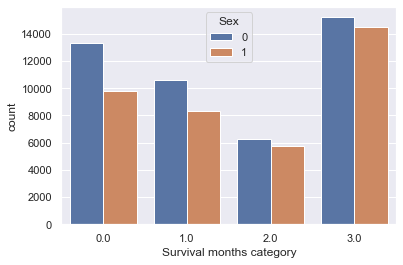

In [41]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x='Survival months category',hue="Sex", data=traindf)

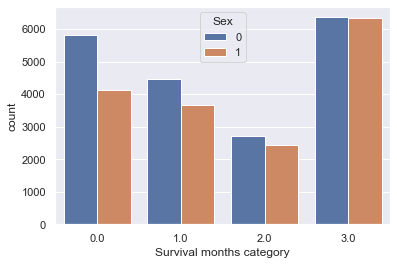

In [42]:
ax = sns.countplot(x='Survival months category',hue="Sex", data=testdf)

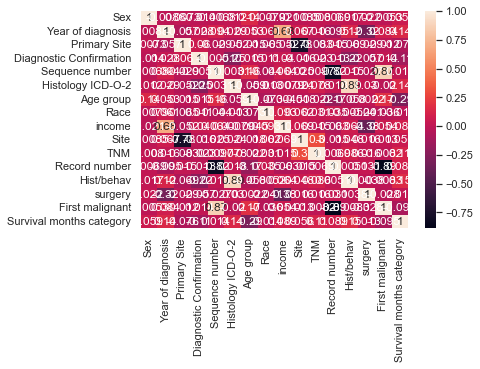

In [43]:
ax = sns.heatmap(data.corr(), annot=True)

# **Model Classification**
Generic function for making a classification model and accessing the performance. 
From AnalyticsVidhya tutorial

## generic functions

In [44]:
def classification_model(model, traindf ,testdf):
    accuracy_dic={}
    x_train, y_train=x_y_split(traindf)
    x_test, y_test=x_y_split(testdf)

    #Fit the model:
    model.fit(x_train, y_train)
    #Make predictions on training set:
    predictions = model.predict(x_train)
    #Print accuracy
    predictions=predictions.A
    accuracy = metrics.accuracy_score(predictions, y_train)
    accuracy_dic['Accuracy (training)']=accuracy

    #Perform k-fold cross-validation with 5 folds
    kf=KFold(n_splits=5)
    error = []
    i=1
    for train, test in kf.split(x_train):
        # Filter training data
        X_train, X_test = x_train.iloc[train,:], x_train.iloc[test,:]
        Y_train , Y_test = y_train.iloc[train,:], y_train.iloc[test,:]
        
        # Training the algorithm.
        model.fit(X_train, Y_train)

        predictions = model.predict(X_test)
        predictions=predictions.A
        
        #Record error from each cross-validation run
        
        accuracy = metrics.accuracy_score(predictions, Y_test)
        error.append(accuracy)
 
        #Record error from each cross-validation run
        iter='Cross-Validation Score '+str(i)
        accuracy_dic[iter]=np.mean(error)
        i+=1
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(x_train,y_train) 

    #Make predictions on test set
    predictions = model.predict(x_test)
 
    #Print accuracy
    predictions=predictions.A
    accuracy = metrics.accuracy_score(predictions, y_test)
    accuracy_dic["Accuracy (test)"]=accuracy

    
    accuracy_df=pd.DataFrame([accuracy_dic])
    return accuracy_df

In [45]:
def classification_model_xgboost(model, traindf ,testdf):
    accuracy_dic={}
    x_train, y_train=x_y_split(traindf)
    x_test, y_test=x_y_split(testdf)

    #Fit the model:
    model.fit(x_train, y_train)
    #Make predictions on training set:
    predictions = model.predict(x_train)
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions, y_train)
    accuracy_dic['Accuracy (training)']=accuracy

    #Perform k-fold cross-validation with 5 folds
    kf=KFold(n_splits=5)
    error = []
    i=1
    for train, test in kf.split(x_train):
        # Filter training data
        X_train, X_test = x_train.iloc[train,:], x_train.iloc[test,:]
        Y_train , Y_test = y_train.iloc[train,:], y_train.iloc[test,:]
        
        # Training the algorithm.
        model.fit(X_train, Y_train)

        predictions = model.predict(X_test)

        #Record error from each cross-validation run
        
        accuracy = metrics.accuracy_score(predictions, Y_test)
        error.append(accuracy)
 
        #Record error from each cross-validation run
        iter='Cross-Validation Score '+str(i)
        accuracy_dic[iter]=np.mean(error)
        i+=1
       
    
    #Fit the model again so that it can be refered outside the function:
    model.fit(x_train,y_train) 

    #Make predictions on test set
    predictions = model.predict(x_test)
 
    #Print accuracy
    accuracy = metrics.accuracy_score(predictions, y_test)
    accuracy_dic["Accuracy (test)"]=accuracy
    
    accuracy_df=pd.DataFrame([accuracy_dic])
    return accuracy_df

In [46]:
def classification(traindf ,testdf):
    score=pd.DataFrame()
    #OneVsRest
    #Binary Relevance
    # initialize binary relevance multi-label classifier
    # with a gaussian naive bayes base classifier
    classifier = BinaryRelevance(GaussianNB())
    acu=classification_model(classifier, traindf ,testdf)
    acu.insert(loc=0, column='classifier', value=['GaussianNB'])
    score=pd.concat([score,acu],ignore_index = True, axis = 0)

    # using classifier chains
    # initialize classifier chains multi-label classifier
    classifier = ClassifierChain(LogisticRegression())
    acu=classification_model(classifier, traindf ,testdf)
    acu.insert(loc=0, column='classifier', value=['LogisticRegression-Classifier Chains '])
    score=pd.concat([score,acu],ignore_index = True, axis = 0)

    # initialize binary relevance multi-label classifier
    # with a gaussian naive bayes base classifier
    classifier = ClassifierChain(
        classifier = SVC(),
        require_dense = [False, True]
    )
    acu=classification_model(classifier, traindf ,testdf)
    acu.insert(loc=0, column='classifier', value=['SVC'])
    score=pd.concat([score,acu],ignore_index = True, axis = 0)

    # using Label Powerset

    # initialize label powerset multi-label classifier
    classifier = LabelPowerset(LogisticRegression())
    acu=classification_model(classifier, traindf ,testdf)
    acu.insert(loc=0, column='classifier', value=['LogisticRegression-Label Powerset'])
    score=pd.concat([score,acu],ignore_index = True, axis = 0)

    # binari xgboost
    classifier =  OneVsRestClassifier(XGBClassifier(objective='binary:logistic'))
    acu=classification_model_xgboost(classifier, traindf ,testdf)
    acu.insert(loc=0, column='classifier', value=['XGBClassifier- binary'])
    score=pd.concat([score,acu],ignore_index = True, axis = 0)

    # multy class xgboost
    classifier =  XGBClassifier(objective='multi:softmax',num_classes=4)
    acu=classification_model_xgboost(classifier, traindf ,testdf)
    acu.insert(loc=0, column='classifier', value=['XGBClassifier- multi'])
    score=pd.concat([score,acu],ignore_index = True, axis = 0)
    return score



## unified models

In [ ]:
unified=classification(traindf ,testdf)
unified.head(20)

In [48]:
unified.head(20)

,classifier,Accuracy (training),Cross-Validation Score 1,Cross-Validation Score 2,Cross-Validation Score 3,Cross-Validation Score 4,Cross-Validation Score 5,Accuracy (test)
0,GaussianNB,0.409004,0.406572,0.409912,0.408640,0.410649,0.408682,0.407721
1,LogisticRegression-Classifier Chains,0.395608,0.358979,0.376603,0.370708,0.369228,0.365560,0.396226
2,SVC,0.354956,0.356116,0.354148,0.354685,0.356614,0.354956,0.353753
3,LogisticRegression-Label Powerset,0.231615,0.227709,0.228544,0.227789,0.228428,0.229564,0.232820
4,XGBClassifier- binary,0.580905,0.525377,0.525705,0.522276,0.524118,0.523541,0.524256
5,XGBClassifier- multi,0.573211,0.523469,0.525288,0.522514,0.525370,0.524698,0.524173


## splitted models

In [ ]:
g1=classification(age_group_1_train,age_group_1_test)

In [50]:
g1.head(20)

,classifier,Accuracy (training),Cross-Validation Score 1,Cross-Validation Score 2,Cross-Validation Score 3,Cross-Validation Score 4,Cross-Validation Score 5,Accuracy (test)
0,GaussianNB,0.557338,0.565938,0.547714,0.550475,0.549958,0.556014,0.559678
1,LogisticRegression-Classifier Chains,0.529100,0.536779,0.529490,0.527060,0.529579,0.530029,0.522573
2,SVC,0.527907,0.539430,0.530152,0.526397,0.527590,0.527907,0.525046
3,LogisticRegression-Label Powerset,0.195148,0.189529,0.174288,0.178706,0.177796,0.178178,0.199753
4,XGBClassifier- binary,0.802201,0.642810,0.640159,0.642810,0.641922,0.639399,0.647186
5,XGBClassifier- multi,0.798886,0.648111,0.642810,0.645461,0.646894,0.642051,0.643476


In [ ]:
g2=classification(age_group_2_train,age_group_2_test)

In [52]:
g2.head(20)

,classifier,Accuracy (training),Cross-Validation Score 1,Cross-Validation Score 2,Cross-Validation Score 3,Cross-Validation Score 4,Cross-Validation Score 5,Accuracy (test)
0,GaussianNB,0.542652,0.544662,0.545479,0.540850,0.538263,0.538948,0.550953
1,LogisticRegression-Classifier Chains,0.564550,0.560458,0.564542,0.559550,0.556781,0.562155,0.570775
2,SVC,0.562806,0.560458,0.564542,0.559550,0.557870,0.562809,0.568488
3,LogisticRegression-Label Powerset,0.165269,0.167756,0.162309,0.158678,0.156863,0.156553,0.164930
4,XGBClassifier- binary,0.770890,0.611656,0.619553,0.618918,0.618328,0.622292,0.636341
5,XGBClassifier- multi,0.765007,0.623638,0.625272,0.621641,0.619553,0.623381,0.634053


In [ ]:
g3=classification(age_group_3_train,age_group_3_test)

In [54]:
g3.head(20)

,classifier,Accuracy (training),Cross-Validation Score 1,Cross-Validation Score 2,Cross-Validation Score 3,Cross-Validation Score 4,Cross-Validation Score 5,Accuracy (test)
0,GaussianNB,0.482534,0.495376,0.493526,0.490873,0.485660,0.482903,0.468405
1,LogisticRegression-Classifier Chains,0.539446,0.535331,0.535516,0.541689,0.541814,0.539151,0.532631
2,SVC,0.539150,0.537551,0.535701,0.541319,0.541814,0.539151,0.534012
3,LogisticRegression-Label Powerset,0.179988,0.180170,0.180725,0.178959,0.178260,0.177693,0.176450
4,XGBClassifier- binary,0.703597,0.559009,0.561968,0.566602,0.564755,0.561353,0.565608
5,XGBClassifier- multi,0.695456,0.561598,0.565483,0.571412,0.568641,0.566015,0.569406


In [ ]:
g4=classification(age_group_4_train,age_group_4_test)

In [56]:
g4.head(20)

,classifier,Accuracy (training),Cross-Validation Score 1,Cross-Validation Score 2,Cross-Validation Score 3,Cross-Validation Score 4,Cross-Validation Score 5,Accuracy (test)
0,GaussianNB,0.389104,0.392265,0.393232,0.387201,0.384418,0.383799,0.384685
1,LogisticRegression-Classifier Chains,0.399602,0.406354,0.401934,0.398435,0.399130,0.399602,0.413304
2,SVC,0.397558,0.404972,0.400414,0.395488,0.396575,0.397558,0.410726
3,LogisticRegression-Label Powerset,0.229970,0.215193,0.226381,0.227716,0.229229,0.229915,0.225861
4,XGBClassifier- binary,0.624765,0.472928,0.476243,0.467035,0.467643,0.468726,0.465515
5,XGBClassifier- multi,0.612554,0.470994,0.473066,0.465470,0.468127,0.469224,0.470672


In [ ]:
g5=classification(age_group_5_train,age_group_5_test)

In [58]:
g5.head(20)

,classifier,Accuracy (training),Cross-Validation Score 1,Cross-Validation Score 2,Cross-Validation Score 3,Cross-Validation Score 4,Cross-Validation Score 5,Accuracy (test)
0,GaussianNB,0.332971,0.326714,0.330496,0.332545,0.335047,0.331835,0.326641
1,LogisticRegression-Classifier Chains,0.319306,0.326241,0.317967,0.315209,0.317790,0.316279,0.314727
2,SVC,0.303702,0.312530,0.308392,0.306068,0.308156,0.304978,0.299393
3,LogisticRegression-Label Powerset,0.272117,0.271631,0.277660,0.274153,0.271868,0.271266,0.283177
4,XGBClassifier- binary,0.591234,0.411111,0.400827,0.401891,0.401537,0.401532,0.412245
5,XGBClassifier- multi,0.581162,0.405437,0.400827,0.401970,0.402069,0.403424,0.413458


In [ ]:
g6=classification(age_group_6_train,age_group_6_test)

In [60]:
g6.head(20)

,classifier,Accuracy (training),Cross-Validation Score 1,Cross-Validation Score 2,Cross-Validation Score 3,Cross-Validation Score 4,Cross-Validation Score 5,Accuracy (test)
0,GaussianNB,0.444034,0.454355,0.452613,0.448780,0.445857,0.441733,0.438862
1,LogisticRegression-Classifier Chains,0.473515,0.475610,0.473171,0.471080,0.472777,0.473516,0.469593
2,SVC,0.473585,0.475610,0.473171,0.471080,0.472777,0.473586,0.469593
3,LogisticRegression-Label Powerset,0.402635,0.410453,0.397735,0.403252,0.401864,0.397615,0.410894
4,XGBClassifier- binary,0.680583,0.508014,0.496864,0.502323,0.498474,0.497629,0.496748
5,XGBClassifier- multi,0.669222,0.507666,0.501568,0.504762,0.502482,0.502578,0.500813


**OneVsRest**

**Binary Relevance**

In [61]:
# # using binary relevance

# # initialize binary relevance multi-label classifier
# # with a gaussian naive bayes base classifier
# classifier = BinaryRelevance(GaussianNB())
# acu=classification_model(classifier, traindf ,testdf)
# acu.insert(loc=0, column='classifier', value=['GaussianNB'])
# score_unified=pd.concat([score_unified,acu],ignore_index = True, axis = 0)


**Classifier Chains**

In [62]:
# # using classifier chains

# # initialize classifier chains multi-label classifier
# classifier = ClassifierChain(LogisticRegression())
# acu=classification_model(classifier, traindf ,testdf)
# acu.insert(loc=0, column='classifier', value=['LogisticRegression-Classifier Chains '])
# score_unified=pd.concat([score_unified,acu],ignore_index = True, axis = 0)

In [63]:
# # initialize binary relevance multi-label classifier
# # with a gaussian naive bayes base classifier
# classifier = ClassifierChain(
#     classifier = SVC(),
#     require_dense = [False, True]
# )
# acu=classification_model(classifier, traindf ,testdf)
# acu.insert(loc=0, column='classifier', value=['SVC'])
# score_unified=pd.concat([score_unified,acu],ignore_index = True, axis = 0)

**Label Powerset**

In [64]:
# # using Label Powerset

# # initialize label powerset multi-label classifier
# classifier = LabelPowerset(LogisticRegression())

# acu=classification_model(classifier, traindf ,testdf)
# acu.insert(loc=0, column='classifier', value=['LogisticRegression-Label Powerset'])
# score_unified=pd.concat([score_unified,acu],ignore_index = True, axis = 0)

**XGBOOST**

In [65]:
# classifier =  OneVsRestClassifier(XGBClassifier(objective='binary:logistic'))
# acu=classification_model_xgboost(classifier, traindf ,testdf)
# acu.insert(loc=0, column='classifier', value=['XGBClassifier- binary'])
# score_unified=pd.concat([score_unified,acu],ignore_index = True, axis = 0)

In [66]:
# classifier =  XGBClassifier(objective='multi:softmax',num_classes=4)
# acu=classification_model_xgboost(classifier, traindf ,testdf)
# acu.insert(loc=0, column='classifier', value=['XGBClassifier- multi'])
# score_unified=pd.concat([score_unified,acu],ignore_index = True, axis = 0)